### Importing Modules

In [1]:
import pandas as pd #data preprocessing library
import numpy as np #Mathematical operations
import matplotlib.pyplot as plt #Plotting tool
import seaborn as sns #plotting tool
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Storing data as a DataFrame

In [2]:
#Data Source: https://data.world/abelvikas/diabetes-type-dataset
df = pd.read_csv('Diabetestype.csv')

### Get info about the data

In [4]:
df.head()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1


## Feature Information

* Age: This is the age of the patients
* BS Fast: This is the blood sugar in fasting (Before Meals), mmol/L
* BS pp: This is the blood sugar in 90 mins after meals mmol/L
* Plasma R: Plasma glucose test randomly taken at any time, mmol/L
* Plasma F: Plasma glucose test fasting usually taken in the morning because it should be taken after at least 8 hours, mmol/L
*  HbA1c: No information provided, mmol/L


In [5]:
df.info() #The data has been cleaned, no missing values, represented with their correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1009 non-null   int64  
 1   BS Fast   1009 non-null   float64
 2   BS pp     1009 non-null   float64
 3   Plasma R  1009 non-null   float64
 4   Plasma F  1009 non-null   float64
 5   HbA1c     1009 non-null   int64  
 6   Type      1009 non-null   object 
 7   Class     1009 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 63.2+ KB


In [6]:
df.describe()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Class
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,33.398414,12.571853,6.659167,10.728741,6.136075,43.481665,0.374628
std,11.633364,12.334019,1.205188,1.436979,1.620659,12.067515,0.484267
min,21.000000,0.000000,4.200000,7.900000,3.900000,28.000000,0.000000
25%,24.000000,5.600000,5.800000,10.200000,4.800000,33.000000,0.000000
50%,29.000000,6.700000,6.800000,10.900000,5.600000,40.000000,0.000000
75%,41.000000,20.000000,7.700000,11.400000,7.800000,53.000000,1.000000
max,81.000000,54.000000,8.800000,13.100000,9.100000,69.000000,1.000000


### Data Cleaning

In [7]:
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1
...,...,...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32,Normal,0
1005,23,6.3,4.2,12.2,7.8,57,Type2,1
1006,37,32.0,7.4,8.7,5.6,41,Normal,0
1007,46,19.0,6.3,7.9,3.9,40,Normal,0


In [8]:
#Dropping the class feature
df.drop("Class",1,inplace=True)

In [9]:
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type
0,50,6.8,8.8,11.2,7.2,62,Type1
1,31,5.2,6.8,10.9,4.2,33,Normal
2,32,6.8,8.8,11.2,7.2,62,Type1
3,21,5.7,5.8,10.7,4.8,49,Normal
4,33,6.8,8.8,11.2,7.2,62,Type1
...,...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32,Normal
1005,23,6.3,4.2,12.2,7.8,57,Type2
1006,37,32.0,7.4,8.7,5.6,41,Normal
1007,46,19.0,6.3,7.9,3.9,40,Normal


# Exploratory Data Analysis

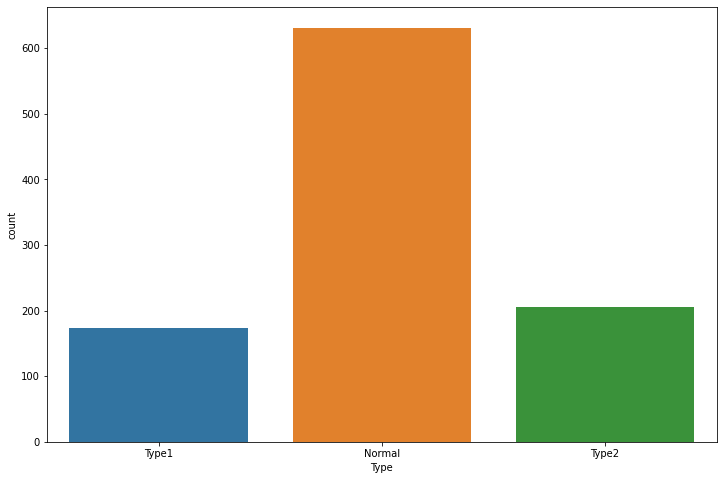

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(df.Type)

* From the data collected, a lot of Patients are normal, and not diabetic and patients with Type1 diabetic are lesser compared to Type2, which makes sense, Type1 diabetics are not so common.

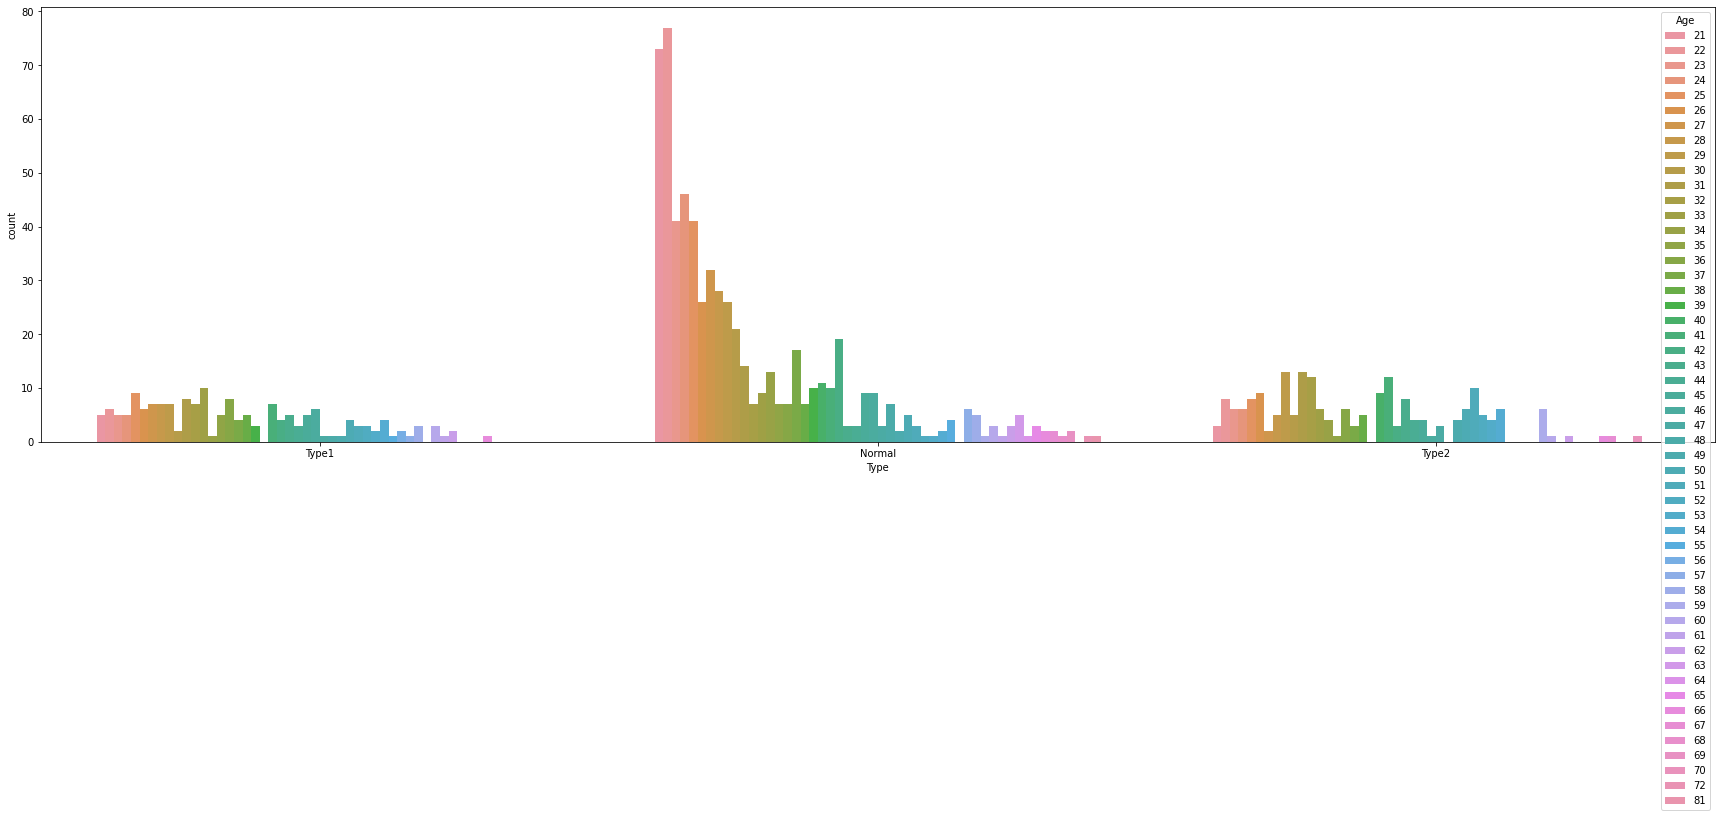

In [10]:
plt.figure(figsize=(30,8))
sns.countplot(df.Type,hue=df.Age)

Text(0.5, 1.0, 'Box Plot of Age with Blood Sugar Level')

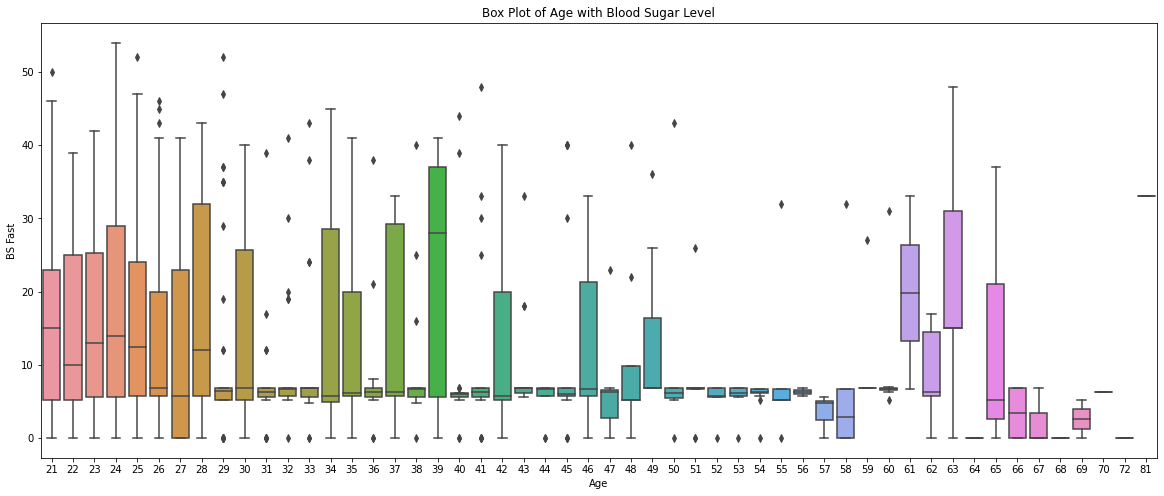

In [11]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Age',y='BS Fast',data=df)
plt.title('Box Plot of Age with Blood Sugar Level')

Text(0.5, 1.0, 'Box Plot of Age with Blood Sugar Level')

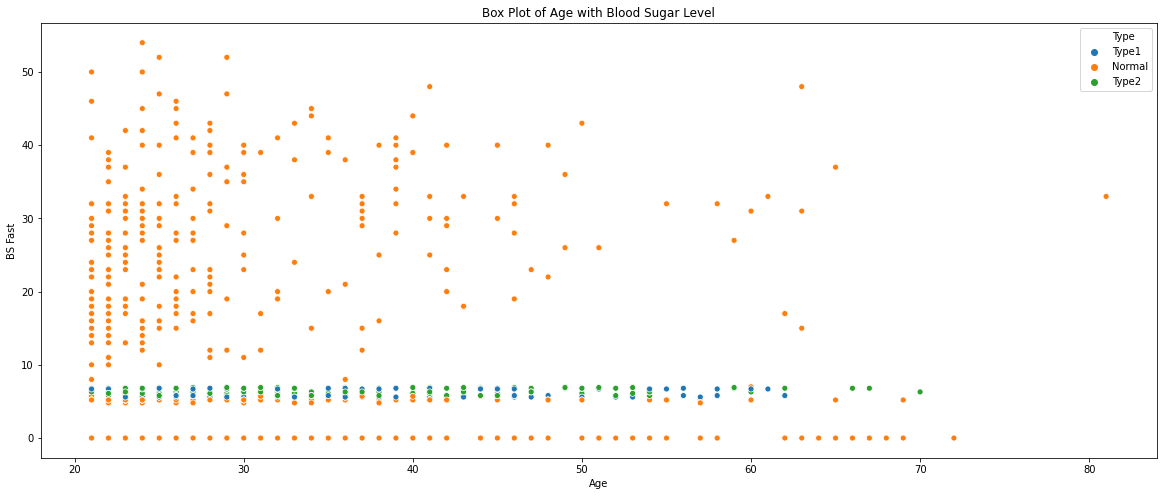

In [12]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Age',y='BS Fast',data=df,hue='Type')
plt.title('Box Plot of Age with Blood Sugar Level')

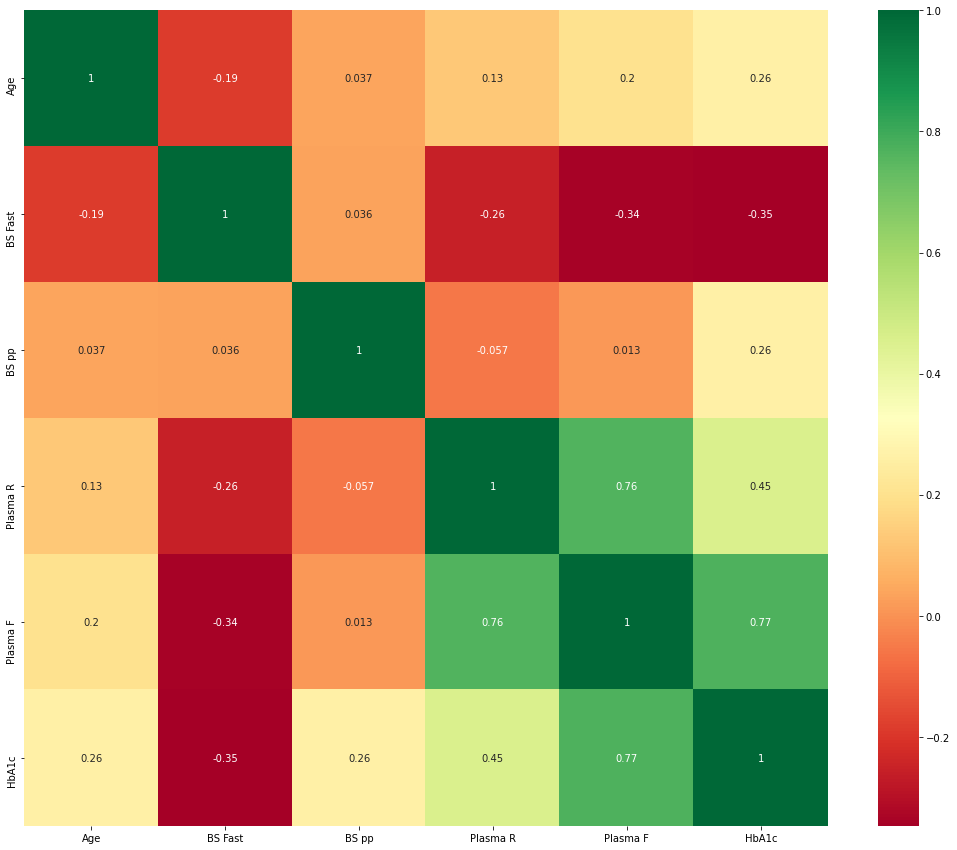

In [11]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

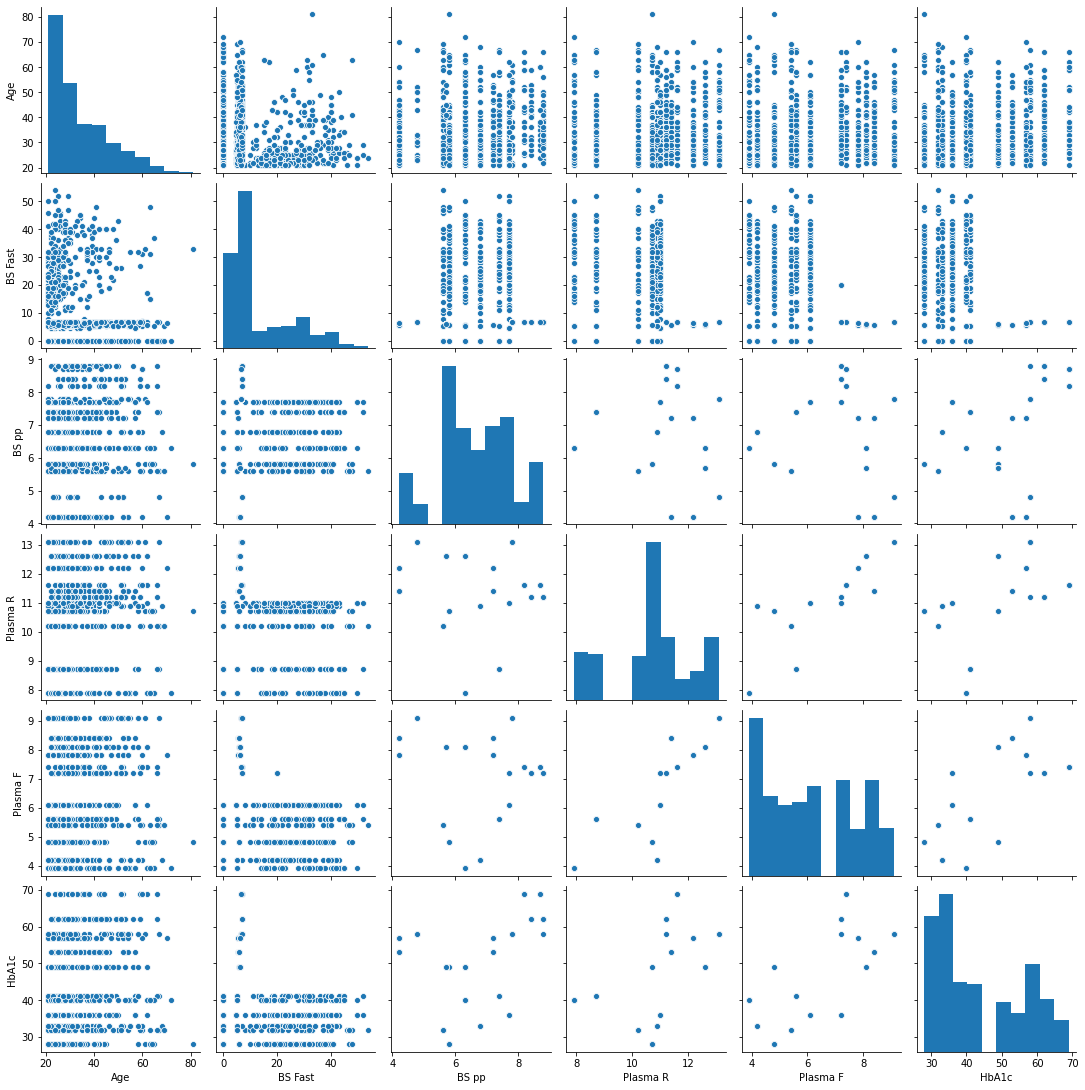

In [12]:
sns.pairplot(df)

## Building the ML model

In [13]:
#import the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [14]:
X = df.drop('Type',1)
y = df.iloc[:,-1]

In [15]:
X

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c
0,50,6.8,8.8,11.2,7.2,62
1,31,5.2,6.8,10.9,4.2,33
2,32,6.8,8.8,11.2,7.2,62
3,21,5.7,5.8,10.7,4.8,49
4,33,6.8,8.8,11.2,7.2,62
...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32
1005,23,6.3,4.2,12.2,7.8,57
1006,37,32.0,7.4,8.7,5.6,41
1007,46,19.0,6.3,7.9,3.9,40


In [16]:
y

0        Type1
1       Normal
2        Type1
3       Normal
4        Type1
         ...  
1004    Normal
1005     Type2
1006    Normal
1007    Normal
1008    Normal
Name: Type, Length: 1009, dtype: object

In [17]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval) #Cross validation to check for biasness and variance

In [18]:
#Testing different base models
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]

In [19]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X, y=y, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.9504359391162996
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.9980148761144771
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 1.0
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 1.0
****


In [20]:
#Lets try train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Feature Selection

In [21]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train,y_train)

In [22]:
#Checking importance of each feature
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

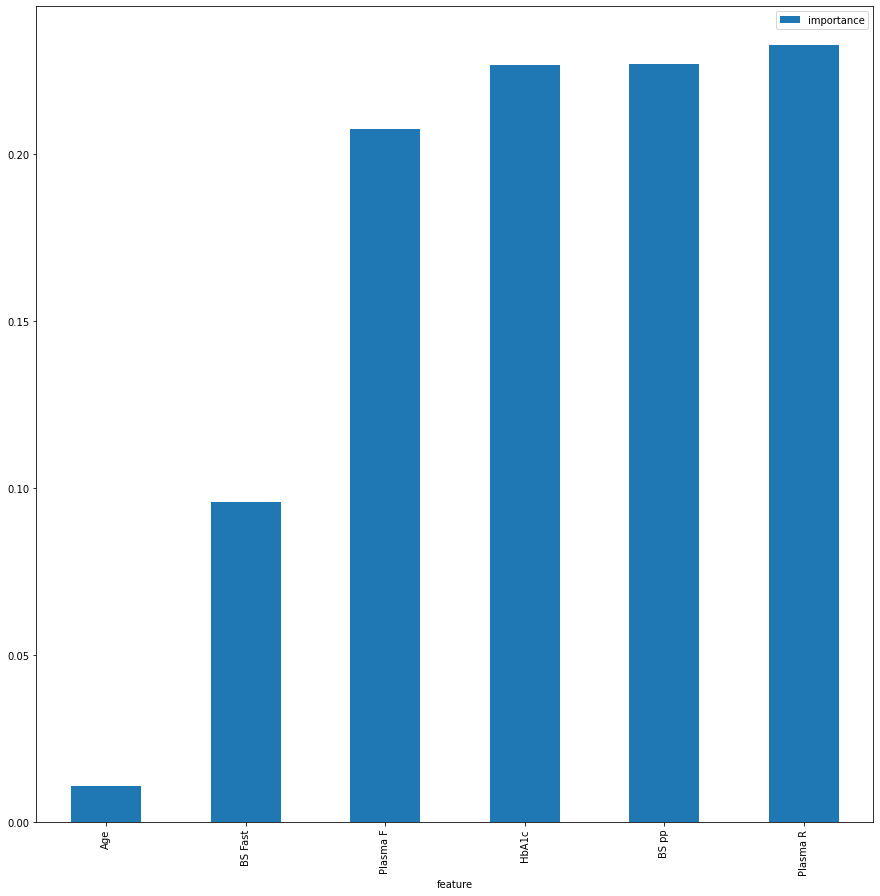

In [23]:
features.plot(kind='bar', figsize=(15,15))

In [24]:
#Using the random forest algorithm
model = rf.fit(X_train,y_train)

In [26]:
X_test

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c
801,22,6.1,5.7,12.6,8.1,49
311,22,37.0,6.8,10.9,4.2,33
85,27,5.2,7.4,8.7,5.6,41
435,29,6.7,8.7,11.6,7.4,69
204,55,32.0,6.3,7.9,3.9,40
...,...,...,...,...,...,...
1001,21,32.0,5.8,10.7,4.8,28
263,63,15.0,6.3,7.9,3.9,40
815,36,6.8,8.2,11.6,7.4,69
704,31,5.2,6.8,10.9,4.2,33


In [41]:
y_test.unique()

array(['Type2', 'Normal', 'Type1'], dtype=object)

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array(['Type2', 'Normal', 'Normal', 'Type1', 'Normal', 'Type2', 'Normal',
       'Type1', 'Normal', 'Normal', 'Type2', 'Normal', 'Type2', 'Normal',
       'Normal', 'Type2', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Type2', 'Normal', 'Normal', 'Type1', 'Normal', 'Normal',
       'Normal', 'Type2', 'Normal', 'Normal', 'Type2', 'Type2', 'Type1',
       'Type1', 'Normal', 'Normal', 'Normal', 'Normal', 'Type1', 'Type1',
       'Normal', 'Normal', 'Type1', 'Type2', 'Type1', 'Normal', 'Type1',
       'Normal', 'Type2', 'Normal', 'Type1', 'Type2', 'Normal', 'Normal',
       'Normal', 'Type2', 'Type1', 'Normal', 'Type2', 'Normal', 'Type2',
       'Type1', 'Normal', 'Normal', 'Normal', 'Type2', 'Normal', 'Normal',
       'Normal', 'Type2', 'Normal', 'Normal', 'Normal', 'Normal', 'Type1',
       'Normal', 'Type1', 'Type1', 'Normal', 'Type1', 'Type2', 'Type2',
       'Normal', 'Type1', 'Type2', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Type1', 'Type1', 'Normal', 'N

In [29]:
#Check the prediction precision and accuracy
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       215
       Type1       1.00      1.00      1.00        56
       Type2       1.00      1.00      1.00        62

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



# Lets do a little prediction

In [37]:
age = 58    
BS_Fast = 8.0
BS_pp = 5.5
Plasma_R= 12.6
Plasma_F = 4.7
HbA1c = 60

In [38]:
result = list(model.predict([[age,BS_Fast,BS_pp,Plasma_R,Plasma_F,HbA1c]]))
conf_score = np.max(model.predict_proba([[age,BS_Fast,BS_pp,Plasma_R,Plasma_F,HbA1c]]))*100
print(f'The Diabetic type is {result[0]}')
print(f'Confidence Score: {conf_score}%')

The Diabetic type is Type2
Confidence Score: 54.0%


In [39]:
#Saving the model with pickle
import pickle
# save the model to disk
model_name  = 'model.pkl'
pickle.dump(model, open(model_name, 'wb'))
print("[INFO]: Finished saving model...")

[INFO]: Finished saving model...
